In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# allows the notebook to render graphics
%matplotlib inline
# a popular data visualization theme
plt.style.use('fivethirtyeight')

Some columns were removed from the stored csv due to github upload limitation. Therefore I have added a link to the resource file. In addition pd.read_csv can be used to pull data in from the site without the need to export any files.

In [6]:
# import first dataset to explore salaries in San Francisco
# https://data.sfgov.org/City-Management-and-Ethics/Employee-Compensation/88g8-5mnd
# salary_ranges = pd.read_json("https://data.sfgov.org/resource/88g8-5mnd.json")
salary_ranges = pd.read_csv("./data/Employee_Compensation.csv")



This section will cover the four levels of data:

* The nominal level
* The ordinal level
* The interval level
* The ratio level


# The nominal level

The nominal has the weakest structure. This data is purely described by name. *Blood type*: [A, O, AB], first and last names, and species of animals in a lab experiment are all examples of nominal. Althouh, we cannot perform math operations at the nominal, we can use pandas *value_counts* methods. We can also use graphs (e.g. bar charts, pie charts) because of our ability to count at the nominal level.

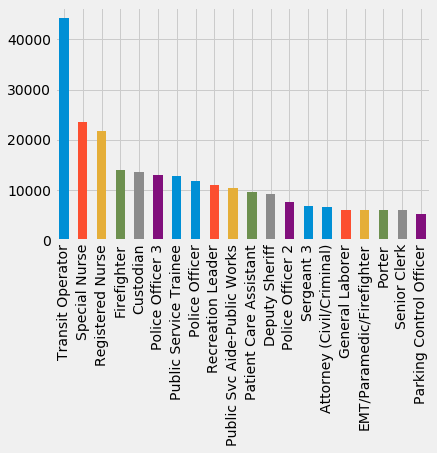

In [11]:
# Bar Chart of the Job column
salary_ranges.Job.value_counts().sort_values(ascending = False).head(20).plot(kind='bar')


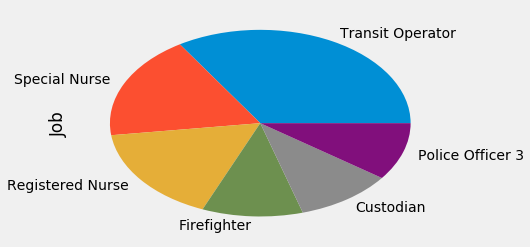

In [22]:
# Pie Chart of the Job column (top 6 values only)
salary_ranges['Job'].value_counts().sort_values(ascending = False).head(6).plot(kind='pie')


# The ordinal level

The ordinal level inherits all of the properties ofthe nominal level, but has inmportant additional properties. Ordinal level data can be naturally ordered. Some values in ordinal level columns can be considered better than or greater than others. Note, data at the ordinal level is categorical (even if numbers are used to represent the categories).

The ordinal level provides additional mathematical abilities. We can still do basic counts, but we can also do some comparisons, orderings, use new graphs, calculate medians, and percentiles. For example we can use a Likert scale (rating on a 1-10 scale). Bringing in a new dataset to work through this example on the ordinal scale; [2013 SFO Customer Survey](https://data.sfgov.org/Transportation/2013-SFO-Customer-Survey/mjr8-p6m5).

In [25]:
# load in the data set
# json export available via api
# https://data.sfgov.org/resource/mjr8-p6m5.json
customer = pd.read_csv('./data/2013_SFO_Customer_Survey.csv')


In [29]:
customer.shape

(3535, 95)

There are 95 columns in this dataset; [data dictionary](https://data.sfgov.org/api/views/mjr8-p6m5/files/FHnAUtMCD0C8CyLD3jqZ1-Xd1aap8L086KLWQ9SKZ_8?download=true&filename=AIR_DataDictionary_2013-SFO-Customer-Survey.pdf) available for this data dataset. Let's look at *Q7A_ART*. This column is about artwork and exhibitions. Here is the 0-6 scale associated with it:

0. Unacceptable
* Below Average
* Average
* Good
* Outstanding
* Have Never Used or Visited
* Blank

In [39]:
# look at all unique values in Q7A_ART column
customer['Q7A_ART'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

In [40]:
art_ratings = customer['Q7A_ART']
art_ratings.describe()

count    3535.000000
mean        4.300707
std         1.341445
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: Q7A_ART, dtype: float64

Pandas considers this column numerical because it contains numbers, but these numbers represent a category. Therefore, this data should be considered qualitative (i.e. ordinal).

In [41]:
# only consider ratings 1-5
art_ratings = art_ratings[(art_ratings >= 1) & (art_ratings <= 5)]

In [42]:
# cast the values as strings
art_ratings = art_ratings.astype(str)

art_ratings.describe()

count     2656
unique       5
top          4
freq      1066
Name: Q7A_ART, dtype: object

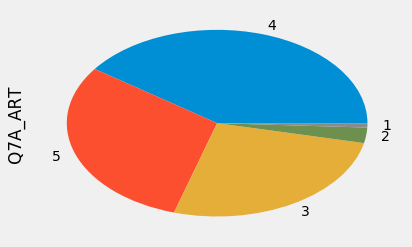

In [43]:
# use a pie chart just like I did earlier in nominal level
art_ratings.value_counts().plot(kind='pie')

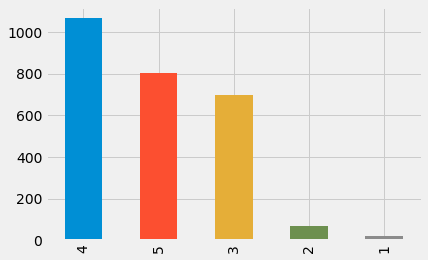

In [44]:
# visualize previous data as bar chart
art_ratings.value_counts().plot(kind='bar')

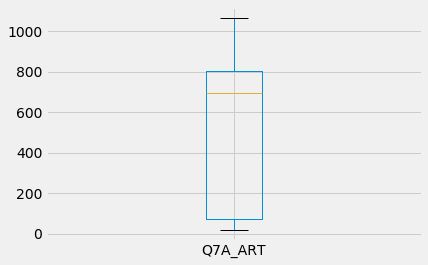

In [45]:
# can also use box plots with ordinal data
art_ratings.value_counts().plot(kind='box')

# The interval level

Let's look at another data set for this section [Climate Change Data - GlobalLandTemperaturesByCity](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data). Many records were removed from the following stored csv due to github upload limitation. The full dataset can be downloaded from the link above.

In [59]:
# load in data set
climate = pd.read_csv('./data/GlobalLandTemperaturesByCity.csv')
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,8.758,1.886,Aberdeen,United Kingdom,57.05N,1.48W
1,1743-12-01,NaN,NaN,Aberdeen,United Kingdom,57.05N,1.48W
2,1744-01-01,NaN,NaN,Aberdeen,United Kingdom,57.05N,1.48W
3,1744-02-01,NaN,NaN,Aberdeen,United Kingdom,57.05N,1.48W
4,1744-03-01,NaN,NaN,Aberdeen,United Kingdom,57.05N,1.48W
